# Home Value at Zillow in Orange, LA, and Ventura Counties 

# Goal:

- Construct an ML Regression model that predicts propery tax assessed values of Single Family Properties using features of the properties.

- Find the key drivers of property value for single family properties. 

- Deliver a report that explains what steps were taken, why and what the outcome was.

- Make recommendations on what works or doesn't work in predicting these homes' values.



# Imports

In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import math
from math import sqrt
import random

#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

#custom imports

import acquire
import prepare
import env

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# setting the seed
a = random.seed(42)

# Acquire

- Data acquired from the codeup zillow database
- It contained 2,985,217 rows and 61 columns before cleaning
- Each row represents a single family home
- Each column represents information about the single family property

In [2]:
# Acquire Step
df = acquire.get_zillow_data()

# Prepare

Prepare Actions:

Dropped unnecessary columns  
Renamed confusing columns  
Dropped duplicate columns  
Replaced null values in the hottub_spa, pools, garages, and stories columns  
Eliminated outliers in the square_footage, bedrooms, bathrooms, and property_value columns   
Dropped null values  
split the data  

In [3]:
train, validate, test = prepare.prep_zillow(df)

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|'airconditioningtypeid'|	 Type of cooling system present in the home (if any)|
|'architecturalstyletypeid'|	Architectural style of the home (i.e. ranch, colonial, split-level, etc…)|
|'basementsqft'| Finished living area below or partially below ground level|
|'bathroomcnt'|	Number of bathrooms in home including fractional bathrooms|
|'bedroomcnt'|	Number of bedrooms in home| 
|'buildingqualitytypeid'|	|Overall assessment of condition of the building from best (lowest) to worst (highest)|
|'buildingclasstypeid'|	The building framing type (steel frame, wood frame, concrete/brick)| 
|'calculatedbathnbr'|	Number of bathrooms in home including fractional bathroom|
|'decktypeid'|	Type of deck (if any) present on parcel|
|'threequarterbathnbr'|	Number of 3/4 bathrooms in house (shower + sink + toilet)|
|'finishedfloor1squarefeet'|	Size of the finished living area on the first (entry) floor of the home|
|'calculatedfinishedsquarefeet'|	Calculated total finished living area of the home| 
|'finishedsquarefeet6'|	Base unfinished and finished area|
|'finishedsquarefeet12'|	Finished living area|
|'finishedsquarefeet13'|	Perimeter  living area|
|'finishedsquarefeet15'|	Total area|
|'finishedsquarefeet50'|	Size of the finished living area on the first (entry) floor of the home|
|'fips'|	Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details|
|'fireplacecnt'|	Number of fireplaces in a home (if any)|
|'fireplaceflag'|	Is a fireplace present in this home| 
|'fullbathcnt'|	Number of full bathrooms (sink, shower + bathtub, and toilet) present in home|
|'garagecarcnt'|	Total number of garages on the lot including an attached garage|
|'garagetotalsqft'|	Total number of square feet of all garages on lot including an attached garage|
|'hashottuborspa'| Does the home have a hot tub or spa|
|'heatingorsystemtypeid'|	Type of home heating system|
|'latitude'|	Latitude of the middle of the parcel multiplied by 10e6|
|'longitude'|	Longitude of the middle of the parcel multiplied by 10e6|
|'lotsizesquarefeet'|	Area of the lot in square feet|
|'numberofstories'|	Number of stories or levels the home has|
|'parcelid'|	Unique identifier for parcels (lots)| 
|'poolcnt'|	Number of pools on the lot (if any)|
|'poolsizesum'|	Total square footage of all pools on property|
|'pooltypeid10'|	Spa or Hot Tub|
|'pooltypeid2'|	Pool with Spa/Hot Tub|
|'pooltypeid7'|	Pool without hot tub|
|'propertycountylandusecode'|	County land use code i.e. it's zoning at the county level|
|'propertylandusetypeid'|	Type of land use the property is zoned for|
|'propertyzoningdesc'|	Description of the allowed land uses (zoning) for that property|
|'rawcensustractandblock'|	Census tract and block ID combined - also contains blockgroup assignment by extension|
|'censustractandblock'|	Census tract and block ID combined - also contains blockgroup assignment by extension|
|'regionidcounty'|	County in which the property is located|
|'regionidcity'|	City in which the property is located (if any)|
|'regionidzip'|	Zip code in which the property is located|
|'regionidneighborhood'|	Neighborhood in which the property is located|
|'roomcnt'|	Total number of rooms in the principal residence|
|'storytypeid'|	Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.|
|'typeconstructiontypeid'|	What type of construction material was used to construct the home|
|'unitcnt'|	Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)|
|'yardbuildingsqft17'|	Patio in  yard|
|'yardbuildingsqft26'|	Storage shed/building in yard|
|'yearbuilt'|	The Year the principal residence was built| 
|'taxvaluedollarcnt'|	The total tax assessed value of the parcel|
|'structuretaxvaluedollarcnt'|	The assessed value of the built structure on the parcel|
|'landtaxvaluedollarcnt'|	The assessed value of the land area of the parcel|
|'taxamount'|	The total property tax assessed for that assessment year|
|'assessmentyear'|	The year of the property tax assessment| 
|'taxdelinquencyflag'|	Property taxes for this parcel are past due as of 2015|
|'taxdelinquencyyear'|	Year for which the unpaid propert taxes were due| 

## A brief look at the data

In [4]:
# Looking at the cleaned up columns
train.head()

,bathrooms,bedrooms,square_footage,fire_place,garage,hottub_spa,lot_size,pools,zip_code,year_built,stories,property_value,optimal_sf
5012,3.0,3.0,2824.0,0.0,2.0,0.0,6650.0,1.0,96987.0,1977.0,2.0,632436.0,0
13826,3.0,4.0,3209.0,0.0,0.0,0.0,18756.0,1.0,96346.0,1979.0,1.0,812000.0,0
52387,2.5,4.0,2494.0,1.0,2.0,0.0,8839.0,0.0,96351.0,1979.0,2.0,370056.0,0
25813,3.0,5.0,2544.0,0.0,0.0,0.0,6111.0,0.0,97329.0,2006.0,1.0,281739.0,0
5126,2.0,3.0,1536.0,0.0,0.0,0.0,7452.0,0.0,97328.0,1982.0,1.0,198000.0,1


# Explore

Questions asked:

    1) Does the square footage of a property increase, decrease, or is irrelevant in 
    determining the property value.
    
    2) What number of bedrooms is optimal for the property value of a house.
    
    3) Does the number of bathrooms increase the property value?
    
    4) Is there an optimal square footage for property value?

<AxesSubplot:title={'center':'Strength of correlation with property value'}>

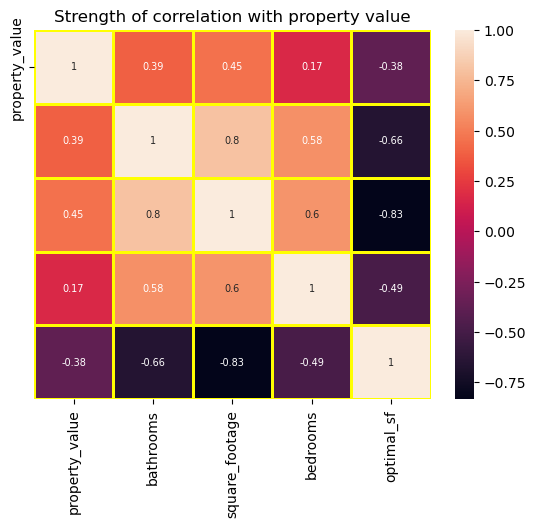

In [5]:
hm_visual = prepare.visual_correlations(train)
hm_visual

***Takeaway:***

Bathrooms, bedrooms, and square footage are the top three features with the strongest correlation.

Square footage has the strongest correlation of all the features.

## 1) Does the square footage of a property increase, decrease, or is irrelevant in determining the property value.

Text(0.5, 0.98, 'Square footage increases property value')

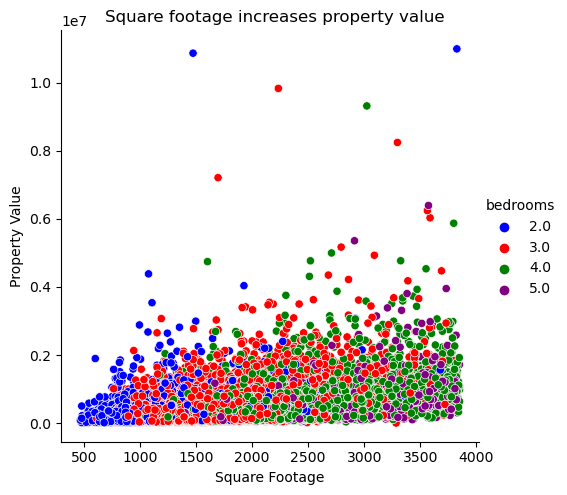

In [6]:
# Visualization for square footage
square_foot_relplot = prepare.sq_ft_visual(train)
square_foot_relplot

- As the square footage increases, the property value increases, but not significantly.


H_0: The square footage of a property is irrelevant in determining property value.  

H_a: The square footage of a property will either increase or decrease property value.

In [7]:
# Running a spearmanr statistical test to check for correlation and have more confidence
sq_footage_stat_test = prepare.eval_result(train)
sq_footage_stat_test

Reject the null hypothesis that the square footage of a property is irrelevant in determining property value.
Sufficient evidence to move forward understanding that the square footage of a property will either increase or decrease property value. p-value= 0.0 r= 0.4679087502111316


***Takeaway:***

There is a moderate corellation between square footage and property value. 

Further investigation into size of the property and its value is necessary in determing the optimal square footage.

## 2) What number of bedrooms is optimal for the property value of a house.

[Text(0.5, 0, 'Bedrooms'),
 Text(0, 0.5, 'Property Value'),
 Text(0.5, 1.0, 'The number of bedrooms increases property value')]

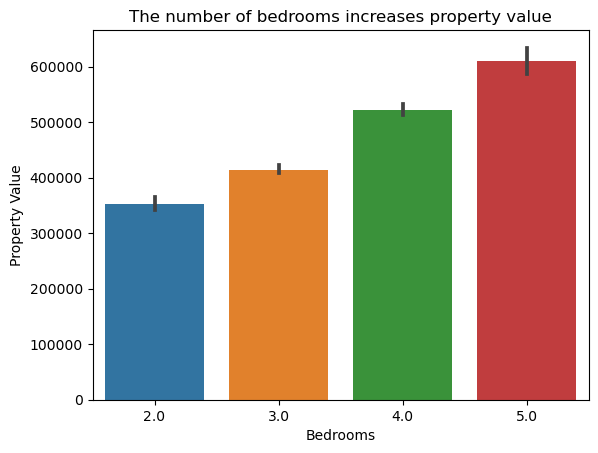

In [8]:
# Visualization to show optimal number of bedrooms.
bed_barplot = prepare.bed_visual(train)
bed_barplot

- As the number of bedrooms increases the property value also increases.
- Although the number of bedrooms increases the property value of the house, it increases at about the same rate, so this may not be an accurate indicator of property value.

H_0: The property value of a house is not dependent on the number of bedrooms.   

H_a: The property value of a house id dependent on the number of bedrooms.

In [9]:
# Running a spearmanr statistical test to check for correlation and have more confidence
bedrooms_stat_test = prepare.eval_result2(train)
bedrooms_stat_test

Reject the null hypothesis that the property value of a house is not dependent on the number of bedrooms.   
Sufficient evidence to move forward understanding that the property value of a house is dependent on the number of bedrooms. p-value = 2.977479524534833e-284 r = 0.21669542959925175


***Takeaway:***

There is a slight correlation between the number of bedrooms and property value. It is difficult to determine the maximum number of bedrooms based on the chart.

## 3) Does the number of bathrooms increase the property value?

[Text(0.5, 0, 'Bathrooms'),
 Text(0, 0.5, 'Property Value'),
 Text(0.5, 1.0, 'Three and a half bathrooms have the highest increase')]

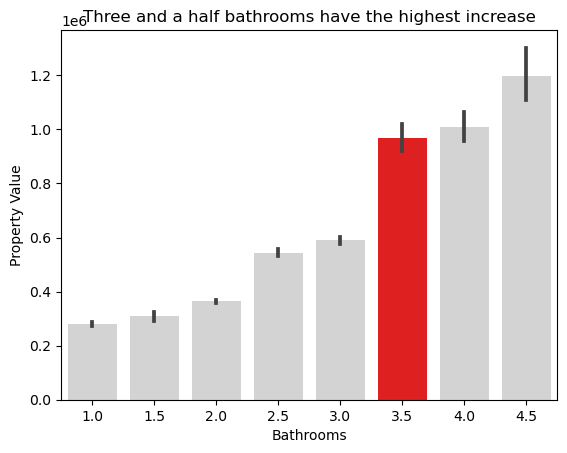

In [10]:
# Visualization to show number of bathrooms that affect property value.
bath_barplot = prepare.bath_visual(train)
bath_barplot

- The largest increase in property value is from three bathrooms to 3.5 bathrooms.
- The more bathrooms the higher the property value.
- From one bathroom to 3 bathrooms and 3.5 bathrooms to 4.5 bathrooms the increase is gradual.

H_0: The number of bathrooms does not affect the property value.

H_a: The number of bathrooms affects the property value.

In [11]:
# Running a spearmanr statistical test to check for correlation and have more confidence
bathrooms_stat_test = prepare.eval_result3(train)
bathrooms_stat_test

Reject the null hypothesis that the number of bathrooms does not affect the property value.   
Sufficient evidence to move forward understanding that the number of bathrooms affects the property value. p-value = 0.0 r = 0.4247684703525294


***Takeaway:***

The optimal number of bathrooms to optimize property value appears to be 3.5. However more investigation is required to confirm this finding. Further analysis on optimizing the cost of building a property, location, and comparing that the total value of the propery is neccessary.

## 4) Is there an optimal square footage for property value?

[Text(0.5, 0, 'Square Footage'),
 Text(0, 0.5, 'Property Value'),
 Text(0.5, 1.0, 'Optimal square footage is from 1000-2000 sq. ft.'),
 [Text(0, 0, 'other sq. ft.'), Text(1, 0, '1000-2000 sq. ft')]]

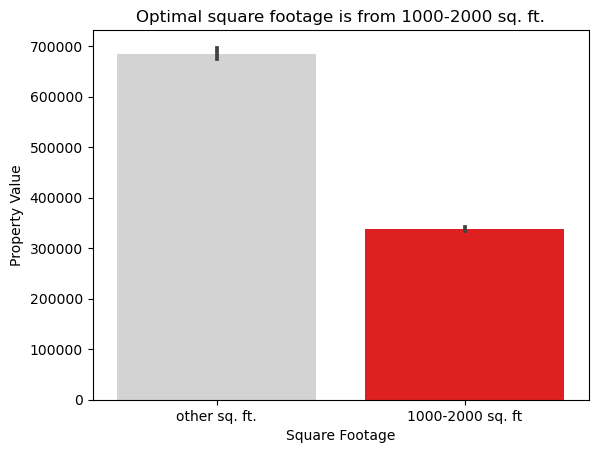

In [12]:
# Visualization to show the optimal square footage to maximize property value
opt_sq_barplot = prepare.opt_sf_visual(train)
opt_sq_barplot

- After comparing four different ranges of square footage (400-1000, 1001-2000, 2001-3000, 3001-4000) the 1001-2000 square feet produced the greatest correlation with property value.
- The sample size may be affecting the overall correlation with property value:
    - 400-1000 sq. ft. = 332,909 homes with a mean value of about 275,000 dollars.
    - 1001-2000 sq. ft. = 1,736,701 homes with a mean value of about 350,000 dollars.
    - 2001-3000 sq. ft. = 601,954 homes with a mean value of about 400,000 dollars.
    - 3001-4000 sq. ft. = 173,767 homes with a mean value of about 450,000 dollars.
- The null hypothesis failed to be rejected for houses from 3001-4000 sq. ft.
- The greatest overall value came from homes between 1001-2000 sq. ft, possibly due to the amount of homes sold in this range.

H_0: There is not an optimal square footage that correlates with property value.   

H_a: There is an optimal square footage that correlates with property value.  

In [13]:
# Running an independent t-test statistical test to compare proportions and have more confidence
optimal_sf_stat_test = prepare.eval_result4(train)
optimal_sf_stat_test

Reject the null hypothesis that there is not an optimal square footage that correlates with property value.    
Sufficient evidence to move forward understanding that there is an optimal square footage that correlates with property value. p-value = 0.0 t = -172.0498985571658


***Takeaway:***

The optimal square footage is between 1001-2000 square feet. However, there is a moderate negative correlation and the large number of homes within this range could be causing this correlation.

# Exploration Summary

- While there is a moderate correlation, further investigation into size of the property and its value is necessary in determing the optimal square footage.
- There is a slight correlation between the number of bedrooms and property value. It is difficult to determine the maximum number of bedrooms based on the chart.
- The optimal number of bathrooms to optimize property value appears to be 3.5. However more investigation is required to confirm this finding. Further analysis on optimizing the cost of building a property, location, and comparing that the total value of the propery is neccessary.
- The optimal square footage is between 1001-2000 square feet. However, there is a moderate negative correlation and the large number of homes within this range could be causing this correlation.

# Features I am moving to modeling With

- "square_footage" (moderate correlation with property value, had the strongest correlation)
- "bedrooms" (slight correlation with property value, but enough to move forward)
- "bathrooms" (moderate correlation with property value)
- "optimal_sf" (moderate negative correlation with property value)
- moving forward with all other features listed in the train dataframe as well. Further testing might eliminate some of these features.

# Features I'm not moving to modeling with

- The optimal square footage for 3001-4000 failed to reject the null hypothesis but left this square footage as part of the total square footage. Further analysis might show that eliminating this square footage could improve the model's performance, or could decrease the performance as well.

# Modeling

- The mean on train and validate will be the baseline I use for this project
- I will be evaluating models developed using four different model types and various hyperparameter configurations 
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data. 
- The Polynomial model produced the best results.

In [14]:
# Function for creating the X_train, y_train, X_validate, y_validate, X_test, y_test, and
# checking the shape.
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.X_y_split(train, 'property_value')

X_train -> (15115, 12)
X_validate -> (6478, 12)
X_test -> (5399, 12)


In [15]:
# Scale the data
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'square_footage', 'property_value', 'year_built', 'fire_place', 'garage', 'hottub_spa', 'lot_size', 'pools', 'zip_code', 'stories', 'optimal_sf'],
               return_scaler=False)

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((26992, 13), (11568, 13), (9640, 13))

In [16]:
# Feture engineering usings RFE to confirm best features.
feature_ranks = prepare.rfe(X_train, y_train, 4)
feature_ranks

,ranking,feature
0,1,bathrooms
1,1,bedrooms
5,1,hottub_spa
11,1,optimal_sf
7,2,pools
10,3,stories
4,4,garage
3,5,fire_place
9,6,year_built
2,7,square_footage


In [17]:
# Start with the baseline
baseline = prepare.baseline(y_train, y_validate)
baseline

RMSE using Mean
Train/In-Sample:  420425.91 
Validate/Out-of-Sample:  449628.34
RMSE using Median
Train/In-Sample:  429718.86 
Validate/Out-of-Sample:  459217.38


# Linear Regression Model

In [18]:
# calling the function for the linear regression model
lr_model = prepare.linear_reg_model(X_train, y_train, y_validate, X_validate)
lr_model

RMSE for OLS using LinearRegression
Training/In-Sample:  364131.13587609906 
Validation/Out-of-Sample:  391482.0528133562


- Linear regression model performed better than the baseline on train and validate

# Lasso-Lars Model

In [19]:
# Calling the function for the lasso-lars model
ll_model = prepare.lasso_lars_model(X_train, y_train, y_validate, X_validate)
ll_model

RMSE for Lasso + Lars
Training/In-Sample:  364131.5392537782 
Validation/Out-of-Sample:  391488.3537827477


- Lasso Lars Model performed better than the baseline on train and validate.

# Polynomial Model

In [20]:
# Calling the function for the polynomial model
pf_model = prepare.poly_model(X_train, y_train, y_validate, X_validate)
pf_model

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  364131.1358760991 
Validation/Out-of-Sample:  391482.0528133562


- Polynomial Model performed better than the baseline on train and validate.

# Comparing Models

- The linear Regression, Lasso-Lars, and Polynomial models all performed better than the baseline.
- The Polynomial model performed the best on train and validate of all the models.
- I have chosen to move forward with the Polynomial model because it performed better on the validate data.

# Polynomial on Test

In [21]:
# Calling the function for the Polynomial test model
p_test_model = prepare.poly_test_model(X_test, y_test)
p_test_model

RMSE for Polynomial model
Out-of-Sample Performance:  364669.4886152274


Model RMSE:  364669.48  
Baseline RMSE:  420425.91 

My Polynomial model performs better than baseline.


## Modeling Summary

- All three of the models performed better than the baseline on train and validate.
- A Polynomial model was selected as the final model and had a better error of prediction than the baseline.

# Conclusions

## Exploration

- Bathrooms, bedrooms, and square footage are the top three features with the strongest correlation.
    - Square footage has the strongest correlation of all the features.
- There is a moderate corellation between square footage and property value. 
    - Further investigation into size of the property and its value is necessary in determing the optimal square footage.
- There is a slight correlation between the number of bedrooms and property value. It is difficult to determine the maximum number of bedrooms based on the chart.
- The optimal number of bathrooms to optimize property value appears to be 3.5. However more investigation is required to confirm this finding. Further analysis on optimizing the cost of building a property, location, and comparing that the total value of the propery is neccessary.
- The optimal square footage is between 1001-2000 square feet. However, there is a moderate negative correlation and the large number of homes within this range could be causing this correlation.

# Modeling

***The final model outperformed the baseline. Possible reasons include:***

- Adding the optimal square footage may have introduced an added feature that increased the model's performance.
- The features that were included could have added correlation to the value of the property.


# Recommendations

- The square footage of a house appears to be optimal between 1000-2000 square feet.
- The number of bedrooms does not apeear to be a significant factor in determining the property value. However, targeted analysis on specific bedroom counts could produce different conclusions.
- The number of optimal bathrooms appears to be 3.5, although more analysis into the increase in value is necessarry to confirm this conclusion.

# Next Steps

- Target locations to determine the highest property values based off of the zipcodes.
- Analyze other features with visualizations and statistical tests, such as number of garages, pools, style of the house, etc... to gain a more detailed analysis of property value.
- A deeper investigation into the large number of properties in this data set come from the 1000-2000 square feet homes. This amount of data should be investigated and analyzed against other properties outside of this square footage. It could be possible that these properties are skewing the results.